In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

from rubin_sim.scheduler.utils import EuclidOverlapFootprint
import glob
import os

/Users/yoachim/git_repos/rubin_sim/rubin_sim/utils/__init__.py:6: DeprecationWarning: rubin_sim.utils is deprecated, switch to rubin_scheduler.utils
  warnings.warn("rubin_sim.utils is deprecated, switch to rubin_scheduler.utils", DeprecationWarning)


ImportError: cannot import name 'get_baseline' from 'rubin_sim.data' (/Users/yoachim/git_repos/rubin_sim/rubin_sim/data/__init__.py)

In [2]:
filenames = glob.glob('*10yrs.db') 

out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)


In [3]:
nside=64

sky = EuclidOverlapFootprint(nside=nside, smc_radius=4, lmc_radius=6)
footprints_hp_array, labels = sky.return_maps()
# define what area we want to call WFD. Leaving out the bulge and LMC/SMC for now
wfd_indx = np.where((labels == 'lowdust') | (labels == 'virgo') | (labels == 'euclid_overlap'))


rms_dict = {}

for fn in filenames:

    run_name = os.path.splitroot(fn).replace('_10yrs.db', '')
    bundle_list = []


    metric = maf.AccumulateCountMetric(bins=np.arange(0,365.25*11, 365.25))
    sql = 'visitexposuretime > 20 and note not like "%%DD%%"'
    slicer = maf.slicers.HealpixSlicer(nside=nside)

    bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=run_name,
                                           plot_funcs=[maf.HealpixSkyMap()]))



    bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
    bg = maf.metricBundles.MetricBundleGroup(bd, fn, out_dir=out_dir, results_db=results_db)
    bg.run_all()
    
    rmss = [np.std(result[wfd_indx]) for result in bundle_list[0].metric_values.T]
    
    rms_dict[run_name] = rmss


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [4]:
bundle_list[0].metric_values.shape

(49152, 10)

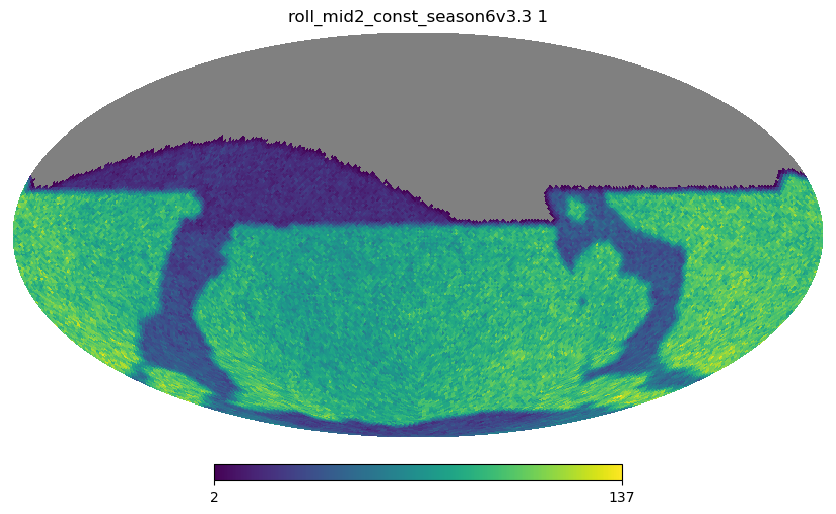

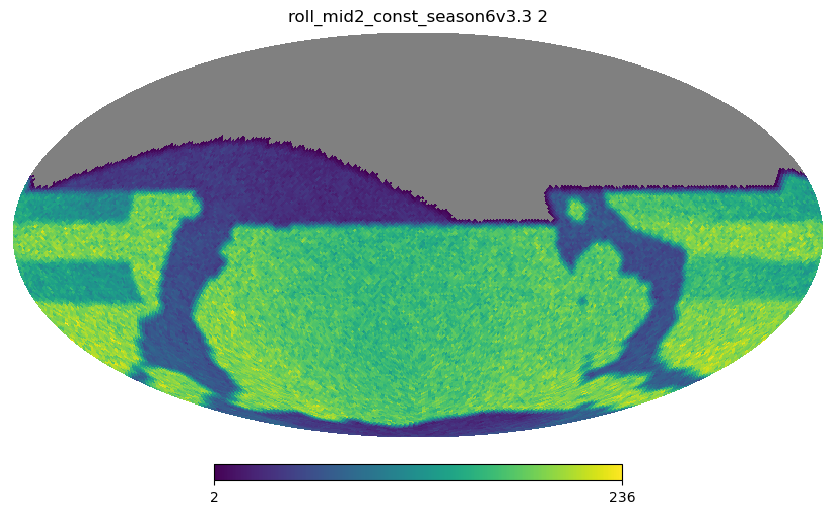

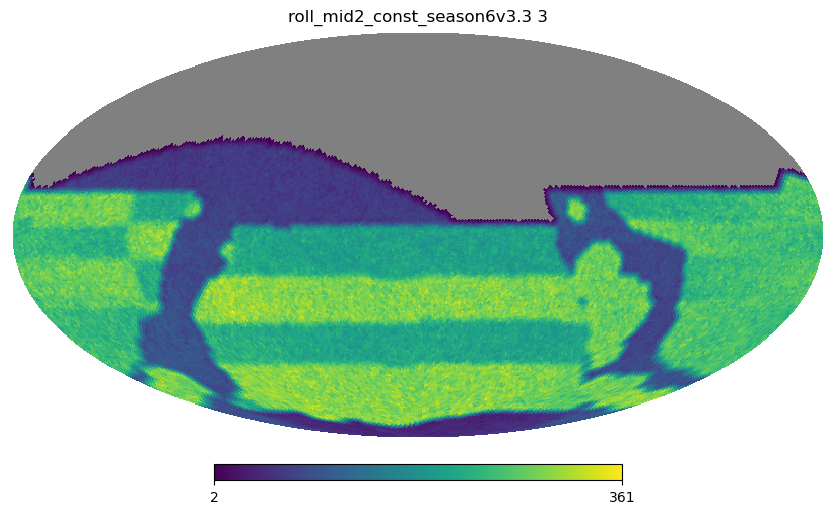

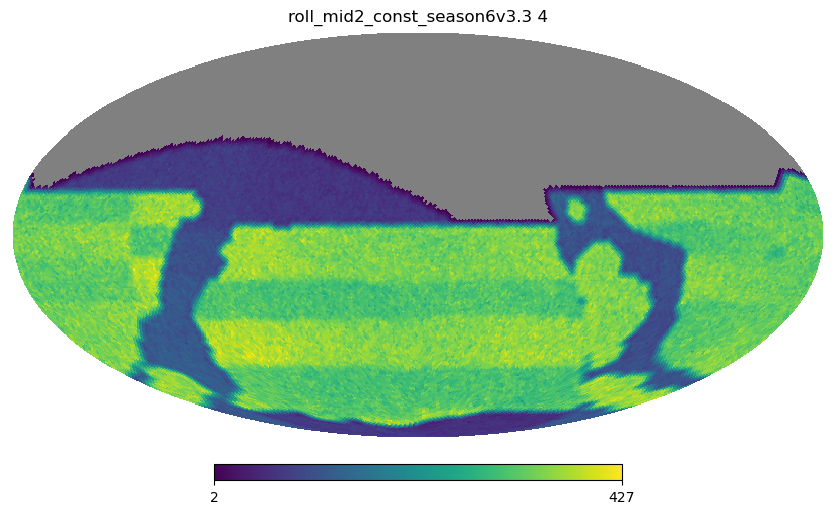

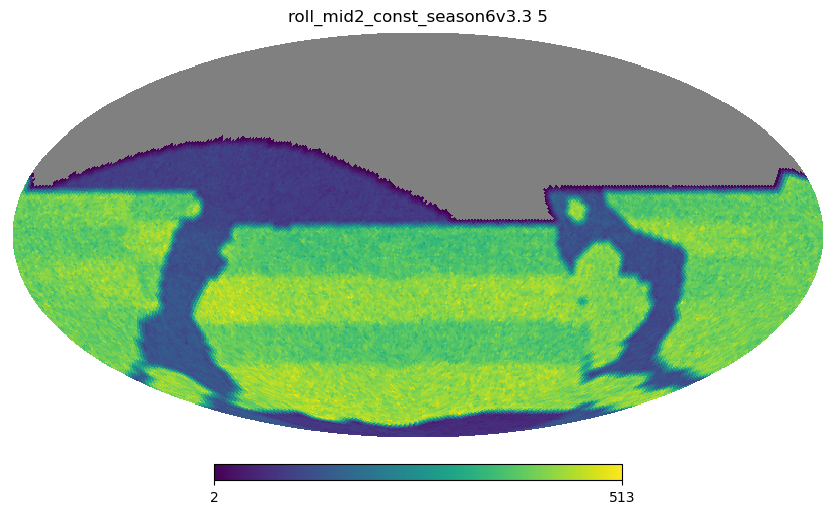

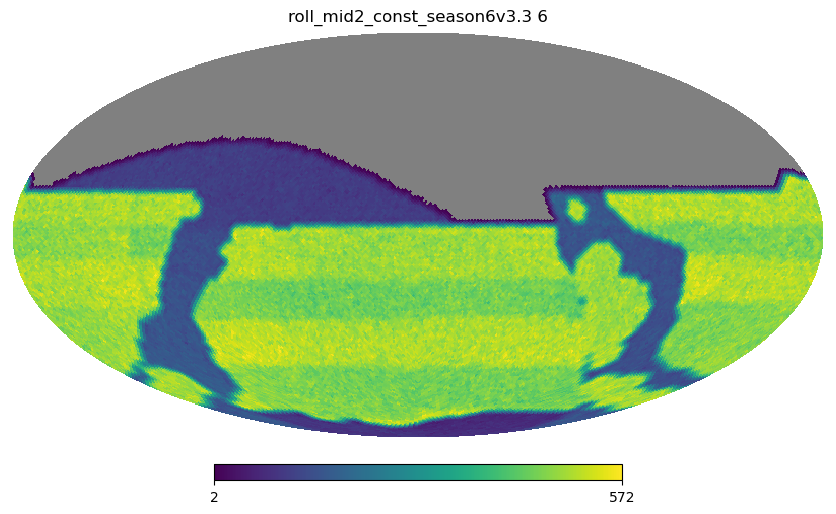

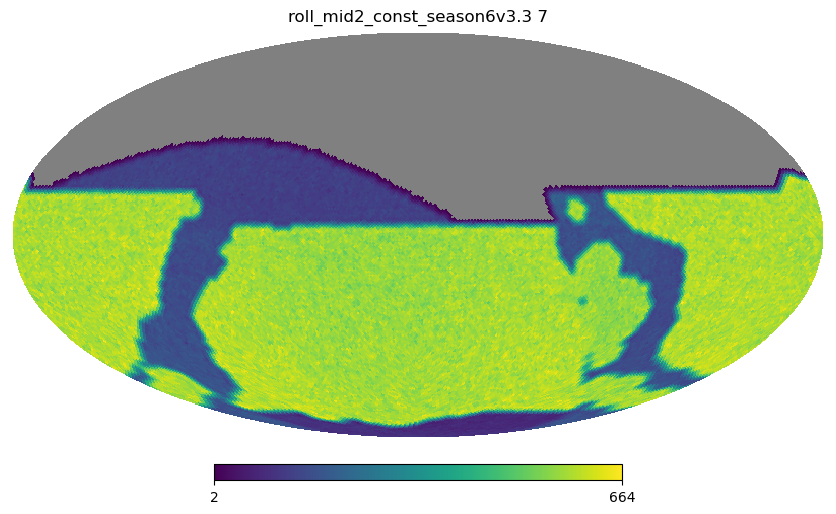

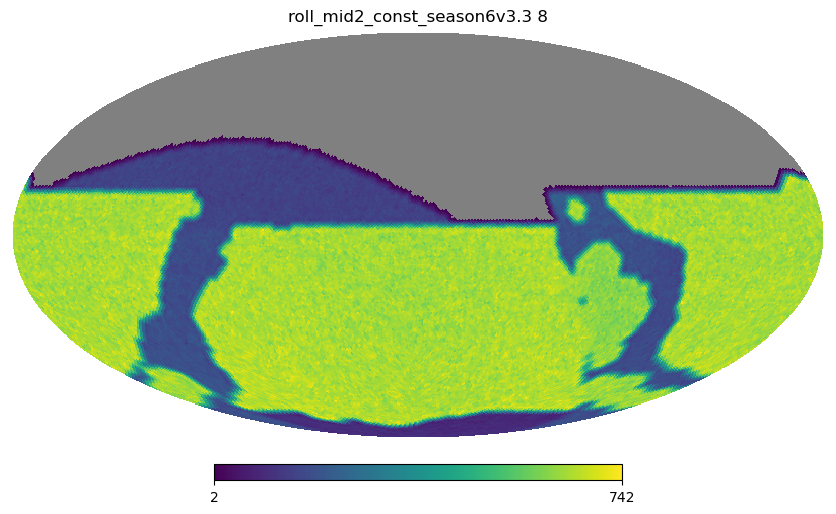

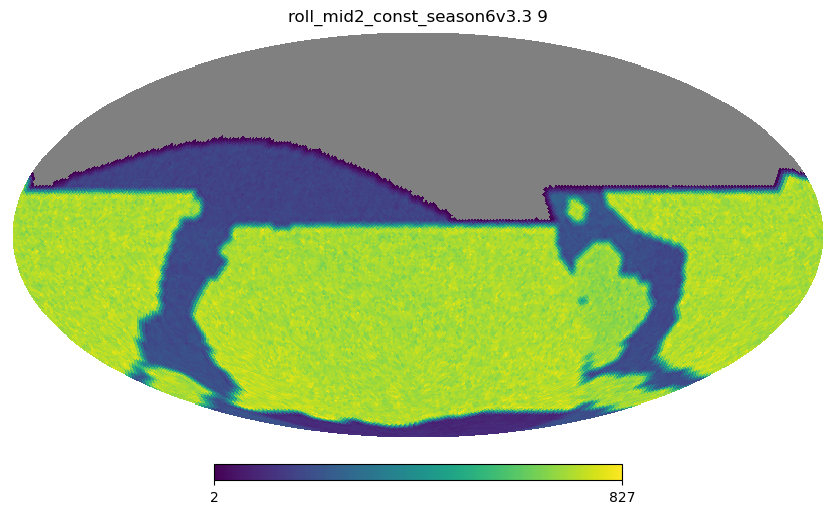

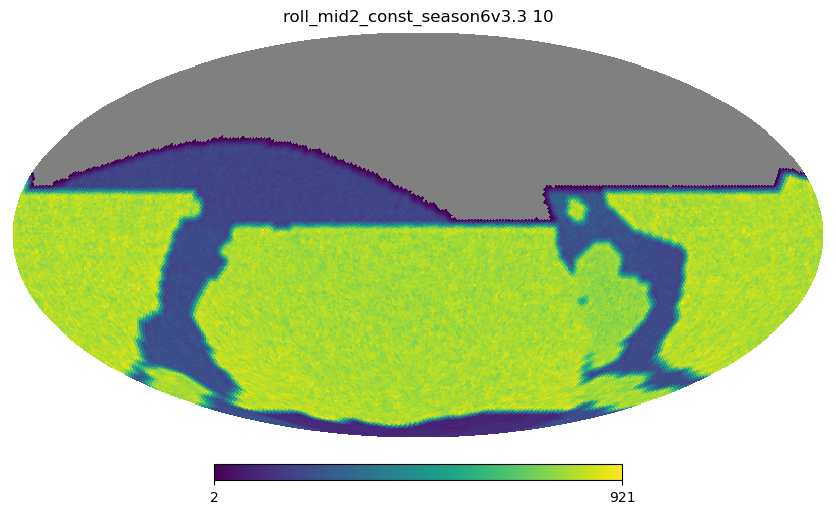

In [5]:
for i in range(bundle_list[0].metric_values.shape[-1]):

    hp.mollview(bundle_list[0].metric_values[:,i], title=run_name + ' %i' % (i+1))

In [6]:
rms_dict

{'roll_mid2_const_season2v3.3': [11.387599736971541,
  31.74163458352585,
  61.43986204076365,
  28.116073045731376,
  47.94659126394398,
  63.5723061602316,
  28.85711067814369,
  28.74146069252073,
  31.07110500740951,
  34.2058717419614],
 'roll_mid2_const_season4v3.3': [11.387599736971541,
  21.06765693187996,
  36.02115445707665,
  26.756014663270996,
  31.68658397713815,
  31.81590410372392,
  27.237841758161387,
  28.400682415335133,
  30.96343227056423,
  33.97459070745128],
 'roll_mid2_const_season_v3.3': [11.387599736971541,
  31.74163458352585,
  61.43986204076365,
  34.65539714376544,
  60.303137285349614,
  26.79889320610216,
  27.003144296608824,
  28.372060057728977,
  30.835870259413557,
  34.076177209187094],
 'roll_mid3_const_season4v3.3': [11.387599736971541,
  31.74163458352585,
  61.43986204076365,
  34.65539714376544,
  60.303137285349614,
  30.87226827365668,
  53.3243777629868,
  65.57285112991022,
  42.44344974758563,
  66.22695234182011],
 'roll_mid3_const_sea

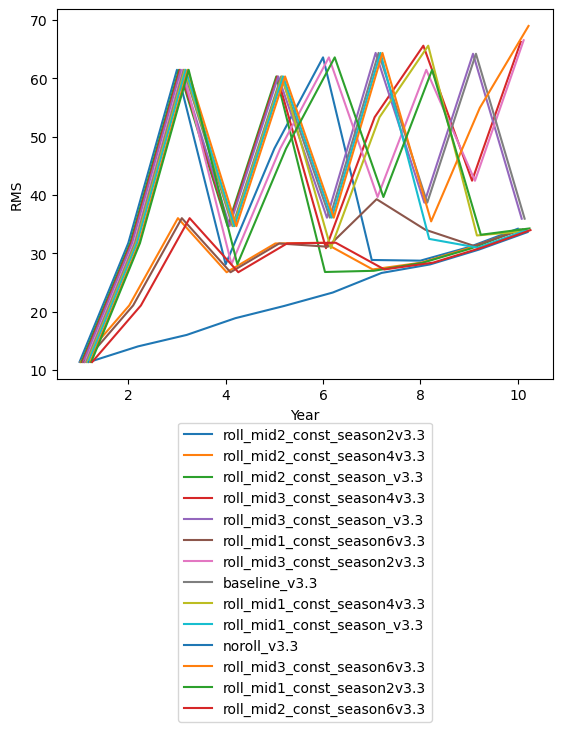

In [7]:
x = np.arange(10)+1
fig = plt.figure(1)
ax = fig.add_subplot(111)

for i,key in enumerate(rms_dict):
    ax.plot(x+.02*i, rms_dict[key], label=key)
    
ax.set_xlabel('Year')
ax.set_ylabel('RMS')
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1))

In [8]:
rms_dict['roll_mid2_const_season6v3.3']


[11.387599736971541,
 21.06765693187996,
 36.02115445707665,
 26.756014663270996,
 31.68658397713815,
 31.81590410372392,
 27.237841758161387,
 28.400682415335133,
 30.96343227056423,
 33.97459070745128]

In [9]:
rms_dict['baseline_v3.3']

[11.387599736971541,
 31.74163458352585,
 61.43986204076365,
 34.65539714376544,
 60.303137285349614,
 36.101019526702714,
 64.33540438204874,
 38.68377410842963,
 64.18901761832727,
 35.931180427891924]